Ways to extract features of text data in order to feed it into a Machine Learning model.<br>
<br>
- Count Vectorizer
- tf-idf

Word Embedding: maps words to real number vectors
I will first use Word2Vec from the gensim library. 
It has two models for training: 
- skip-gram
- continuous bag of words



In [1]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
import numpy as np
import re
import io
from collections import Counter

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
corpus = df['text'].dropna()

In [5]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [6]:
corpus.head()

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else, not even gold, the Super...
Name: text, dtype: object

In [7]:
corpus_string = df.text.str.cat(sep=' ')

In [8]:
type(corpus_string)

str

## Tokenize

In [9]:
text=re.sub(r"[^.A-Za-z]",' ',corpus_string)
sentence=text.split('.')
tokens=[nltk.word_tokenize(words) for words in sentence]
tokens

[['This',
  'process',
  'however',
  'afforded',
  'me',
  'no',
  'means',
  'of',
  'ascertaining',
  'the',
  'dimensions',
  'of',
  'my',
  'dungeon',
  'as',
  'I',
  'might',
  'make',
  'its',
  'circuit',
  'and',
  'return',
  'to',
  'the',
  'point',
  'whence',
  'I',
  'set',
  'out',
  'without',
  'being',
  'aware',
  'of',
  'the',
  'fact',
  'so',
  'perfectly',
  'uniform',
  'seemed',
  'the',
  'wall'],
 ['It',
  'never',
  'once',
  'occurred',
  'to',
  'me',
  'that',
  'the',
  'fumbling',
  'might',
  'be',
  'a',
  'mere',
  'mistake'],
 ['In',
  'his',
  'left',
  'hand',
  'was',
  'a',
  'gold',
  'snuff',
  'box',
  'from',
  'which',
  'as',
  'he',
  'capered',
  'down',
  'the',
  'hill',
  'cutting',
  'all',
  'manner',
  'of',
  'fantastic',
  'steps',
  'he',
  'took',
  'snuff',
  'incessantly',
  'with',
  'an',
  'air',
  'of',
  'the',
  'greatest',
  'possible',
  'self',
  'satisfaction'],
 ['How',
  'lovely',
  'is',
  'spring',
  'As',
 

In [11]:
tokens = [word for word in tokens if not word in stopwords]

In [12]:
model = Word2Vec(tokens,size=50,sg=1,min_count=1)

In [13]:
model['house']

<ipython-input-13-a05e2f63d15d>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['house']


array([ 5.5487728e-01,  1.4237070e-01, -6.4136076e-01, -1.3637701e-01,
       -2.9096177e-01,  2.0100145e-01, -4.3611881e-01, -1.4424358e-01,
       -2.6101339e-01, -5.2496576e-01, -1.5611955e-04,  3.0025294e-01,
        1.2345768e-02, -2.6501811e-01, -3.7236413e-01, -7.5748456e-01,
        4.4182515e-01,  4.1230613e-01, -2.2091217e-01, -6.3425624e-01,
        3.9976172e-02,  1.4193115e-01,  3.8667211e-01,  1.7315239e-01,
       -6.2584436e-01, -3.9975882e-01,  7.6686740e-01,  6.7179918e-02,
        6.2989473e-01,  1.7465536e-01,  1.9596404e-01,  1.2576948e-01,
        6.6309325e-02,  4.7971781e-02, -4.0710613e-01,  3.0756459e-01,
        3.5186350e-01,  7.2127974e-01, -1.1571899e-01, -4.8405088e-02,
        3.3054046e-02, -5.9756047e-01,  2.4645222e-02, -3.2932264e-01,
       -4.8654816e-01, -5.5925941e-01, -5.9452001e-02,  2.3059709e-01,
        4.3931088e-01, -1.8851113e-02], dtype=float32)

In [14]:
words=list(model.wv.vocab)
print(words)

['This', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'my', 'dungeon', 'as', 'I', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'point', 'whence', 'set', 'out', 'without', 'being', 'aware', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'wall', 'It', 'never', 'once', 'occurred', 'that', 'fumbling', 'be', 'a', 'mere', 'mistake', 'In', 'his', 'left', 'hand', 'was', 'gold', 'snuff', 'box', 'from', 'which', 'he', 'capered', 'down', 'hill', 'cutting', 'all', 'manner', 'fantastic', 'steps', 'took', 'incessantly', 'with', 'an', 'air', 'greatest', 'possible', 'self', 'satisfaction', 'How', 'lovely', 'is', 'spring', 'As', 'we', 'looked', 'Windsor', 'Terrace', 'on', 'sixteen', 'fertile', 'counties', 'spread', 'beneath', 'speckled', 'by', 'happy', 'cottages', 'wealthier', 'towns', 'in', 'former', 'years', 'heart', 'cheering', 'fair', 'Finding', 'nothing', 'else', 'not', 'even', 'Superintendent', 'abandoned', 'attempts', 'but', 'per

In [15]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.head()

<ipython-input-15-98586f9c3d58>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[model.wv.vocab]


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.451576,0.223400,-0.247609,-0.487424,-0.234205,0.429888,-0.665935,-0.038908,-0.208452,-0.736517,...,-0.133224,-0.840844,-0.152487,-0.182032,-0.414401,1.102483,-0.393740,0.515957,0.140287,0.038233
1,0.282501,-0.169178,-0.374093,-0.096670,0.027251,0.021932,-0.516029,-0.191290,-0.000013,-0.229179,...,-0.035320,-0.402082,-0.129304,-0.089534,-0.349353,0.253518,-0.091912,0.375473,0.192494,-0.031267
2,0.615442,-0.148119,-0.280058,-0.342598,0.009282,-0.044806,-0.508868,0.040940,0.040261,-0.385416,...,-0.069123,-0.351294,-0.337408,0.311949,-0.185963,0.950148,-0.539385,0.561922,0.226271,0.212798
3,0.102944,-0.087206,-0.432430,0.072987,-0.040306,0.173773,-0.567928,-0.369369,-0.000235,-0.341346,...,0.125071,-0.430908,-0.137429,-0.096827,-0.346260,0.312000,-0.084907,0.564938,0.248213,0.022123
4,0.099081,-0.120617,-0.173326,0.148906,-0.034191,0.100991,-0.998612,-0.364963,-0.017546,0.108588,...,0.582454,-0.315202,-0.000706,-0.717219,-1.114642,0.808431,-0.482676,0.625650,0.576269,-0.550169


In [16]:
df.shape

(27481, 50)

In [17]:
#Computing the correlation matrix
X_corr=df.corr()

In [18]:
#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

In [19]:
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

In [20]:
#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

In [21]:
#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

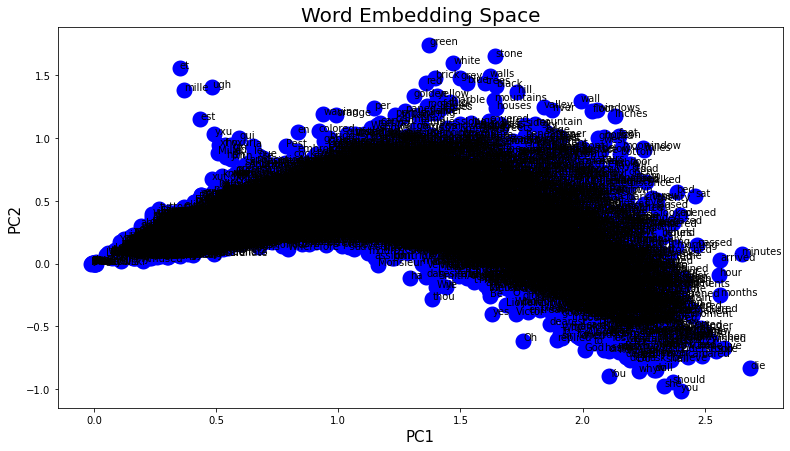

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

Find the K most frequent words

In [39]:
split_it = corpus_string.split()

In [42]:
stopwords_lst = set(stopwords.words('english'))

NameError: name 'stopwords' is not defined

In [40]:
Counter = Counter(split_it)

In [41]:
most_occur = Counter.most_common(4)
  
print(most_occur)

[('the', 33296), ('of', 20851), ('and', 17059), ('to', 12615)]
